# Project

## Imports

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd
import plotly.io as pio
import seaborn as sns
%matplotlib inline

In [8]:
from utils import *
from handle_dataset import *
from density import * 
from zscore import *
from plots import * 
from kmeans import *

In [9]:
DATA_PATH = 'data'

In [10]:
activities_labels = {
    1 : 'STAND',
    2 : 'SIT',
    3 : 'SIT&TALK',
    4 : 'WALK',
    5 : 'WALK&TALK',
    6 : 'CLIMB_STAIRS',
    7 : 'CLIMB_STAIRS&TALK',
    8 : 'STAND_TO_SIT',
    9 : 'SIT_TO_STAND',
    10: 'STAND_TO_SIT&TALK',
    11: 'SIT&TALK_TO_STAND',
    12: 'STAND_TO_WALK', 
    13: 'WALK_TO_STAND', 
    14: 'STAND_TO_CLIMB_STAIRS',
    15: 'CLIMB_STAIRS_TO_WALK',
    16: 'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

}

In [11]:
labels = [
    'STAND',
    'SIT',
    'SIT&TALK',
    'WALK',
    'WALK&TALK',
    'CLIMB_STAIRS',
    'CLIMB_STAIRS&TALK',
    'STAND_TO_SIT',
    'SIT_TO_STAND',
    'STAND_TO_SIT&TALK',
    'SIT&TALK_TO_STAND',
    'STAND_TO_WALK', 
    'WALK_TO_STAND', 
    'STAND_TO_CLIMB_STAIRS',
    'CLIMB_STAIRS_TO_WALK',
    'CLIMB_STAIRS&TALK_TO_WALK&TALK', 

]

## Exercise 2 - Import dataset

In [12]:
# data_user_0 = get_user_data(path=DATA_PATH, user_id=0)

In [13]:
# data_user_0.shape

In [14]:
dataset = get_all_data(DATA_PATH)

In [15]:
# dataset.shape

In [16]:
# type(dataset)

## Explore data

In [17]:
dataset.describe()

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity
count,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06,3.242728e+06
mean,3.429246e+00,7.717793e-01,8.451621e+00,1.520613e+00,-1.691060e-01,1.890623e+00,3.556803e-01,-1.450031e-02,6.034252e-01,4.014632e-01,5.555476e+05,4.032846e+00
std,1.188858e+00,2.494840e+00,3.743438e+00,3.747458e+00,3.592437e+01,5.289265e+01,4.621969e+01,4.767157e-01,4.752627e-01,6.953205e-01,3.720966e+05,2.582780e+00
min,1.000000e+00,-2.489000e+01,-2.324600e+01,-2.502500e+01,-5.088600e+02,-5.071500e+02,-4.077900e+02,-2.002100e+00,-1.438800e+00,-1.658700e+00,2.612300e+01,1.000000e+00
25%,2.000000e+00,-5.244600e-01,8.352300e+00,-1.328500e+00,-2.967200e+00,-2.829200e+00,-1.415125e+00,-4.087100e-01,5.211000e-01,-1.977500e-01,2.720200e+05,2.000000e+00
50%,3.000000e+00,3.722300e-01,9.388200e+00,1.323900e+00,1.709100e-01,-1.321600e-01,-1.696150e-02,3.941900e-02,7.182500e-01,4.391300e-01,5.370900e+05,4.000000e+00
75%,4.000000e+00,2.006400e+00,9.801800e+00,3.299600e+00,5.930100e+00,8.948325e+00,5.541700e+00,3.250500e-01,8.825900e-01,9.627200e-01,8.008600e+05,5.000000e+00
max,5.000000e+00,2.538100e+01,2.598500e+01,2.529000e+01,5.061000e+02,5.035700e+02,4.741600e+02,1.606100e+00,2.988100e+00,3.085500e+00,2.825500e+06,1.600000e+01


In [18]:
# dataset.info()

In [19]:
# dataset.columns

## Append metrics

In [20]:
data_with_features = append_metrics(dataset)

In [21]:
data_with_features

,device_id,accelerometer_x,accelerometer_y,accelerometer_z,gyroscope_x,gyroscope_y,gyroscope_z,magnetometer_x,magnetometer_y,magnetometer_z,timestamp,activity,accelerometer_module,gyroscope_module,magnetometer_module
0,1,-1.8650,9.3890,2.58120,-1.141800,-1.18560,0.84998,-0.34476,0.59839,1.01340,505.89,1,9.914340,1.852517,1.226340
1,1,-1.7963,9.3742,2.44600,-1.561800,-0.66165,0.59730,-0.34274,0.57631,1.00000,525.42,1,9.853184,1.798268,1.203995
2,1,-1.8696,9.3000,2.35140,-1.187700,-1.28410,0.14212,-0.34476,0.59639,1.01560,544.95,1,9.773151,1.754919,1.227185
3,1,-1.7961,9.3624,2.45840,-0.583990,-2.03340,0.42912,-0.32863,0.62249,1.01560,564.48,1,9.845011,2.158681,1.235692
4,1,-1.6768,9.3506,2.46850,-0.370500,-1.36470,0.37194,-0.33669,0.62048,1.02450,584.01,1,9.815237,1.462196,1.244169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242723,5,-1.0568,9.7161,0.37560,-0.158430,-0.88740,0.44327,0.12121,0.62675,0.36739,1061000.00,1,9.780619,1.004523,0.736534
3242724,5,-1.0565,9.6921,0.38826,0.112400,-0.59353,0.39687,0.11111,0.59880,0.36304,1061000.00,1,9.757240,0.722784,0.709017
3242725,5,-1.0566,9.6920,0.37607,-0.054114,-0.67227,0.36407,0.11717,0.58084,0.35217,1061100.00,1,9.756674,0.766435,0.689295
3242726,5,-1.0563,9.6801,0.38850,0.096447,-0.51923,0.16742,0.11717,0.61677,0.36304,1061100.00,1,9.745309,0.554014,0.725212


## Select only right wrist data

Nos seguintes exercícios, apensa serão usados o dataset do pulso direito

In [22]:
def get_device_data(data, device_id):
    return data[data['device_id'] == device_id]

In [23]:
right_wrist_id = 2
data = get_device_data(data_with_features, right_wrist_id)
right_wrist_data = data[['accelerometer_module', 'gyroscope_module', 'magnetometer_module', 'activity']]
right_features = right_wrist_data[['accelerometer_module','gyroscope_module', 'magnetometer_module']]

## Exercise 3.1 - Boxplot of the vector modules grouped by activity

In [24]:
# boxplot_features(data_with_features, 0)
# boxplot_features(data_with_features, 1)
# boxplot_features(data_with_features, 2)

Pelos boxplot dos módulos dos diferentes vetores podemore concluir que :
    - as variáveis estão em ordens de grandeza muito diferentes
    - existe muito quantidade de outliers, no entanto isto pode dever-se também a estarem a ser utilizados neste gráfico, todos os dispositivos de sensores, que impactam os resultados


### Plotting boxplot of the modules by activity separated by devices

![Boxplot core](./data/images/boxplot.png "Boxplot - detect outliers")

### Plot of the right wrist (id = 2)

In [25]:
# boxplot_features(right_wrist_data, 0, title='Right wrist')
# boxplot_features(right_wrist_data, 1, title='Right wrist')
# boxplot_features(right_wrist_data, 2, title='Right wrist')

Ao utilizar os dados de apenas um dispositivo, é notório que a quantidade de outliers diminui consideravelmente. Verificando-se, no caso da variavel 'accelerometer_module' 

In [26]:
# right_wrist_data.describe()

## Exercise 3.2 - Outliers density

In [27]:
# densities = calculate_density_by_activity(data, labels)
# densities

In [28]:
# plot_densities(densities)

Como se pode observar pelas densidades de outliers obtidas, o vetor de aceleração é o que apresenta maior quantidade de outliers. Isto poderá dever-se ao facto de ser o mais sensível a movimentos da pessoa. Pelo contrátrio, o vetor de variação do campo magnético, em algumas situações nem apresenta outliers. Outra conclusão que podemos retirar do gráfico, é que as atividades *Sit to stand* e *Sit and talk to stand* são as que apresentam maior quantidade de outliers nos três vetores, mostrando que o movimento de levantar gera muitas oscilações e perturbações nos sensores.

## Exercise 3.3 - Z-score test

In [29]:
# plot_zscore_outliers(data,'accelerometer_module')
# plot_zscore_outliers(data,'gyroscope_module')
# # plot_zscore_outliers(data,'magnetometer_module')

Pelos gráficos, podemos observar que à medida que o k aumenta, o número de pontos considerados outliers diminui. Mostra-se assim, que ao aumentar k, aumentamos a gama de valor válidos, sendo menos restrito a certos outliers

## Exercise 3.6 - K-means

Como se pode observar, segundo o método Elbow, k=9 parece ser o número de clusters ideal

#### Plot by devices

In [30]:
# kmeans = KMeans(optimal_k)

In [31]:
# labels = kmeans.predict(right_features)

In [32]:
# plot_kmeans_clusters(kmeans.data, labels)

In [33]:
# labels.to_csv('labels.csv', index=False)

In [34]:
# plot_kmeans_clusters(kmeans.data, right_wrist_data['activity'] )

In [35]:
accelerometer_data = data[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']]
gyroscope_data = data[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']]
magnetometer_data = data[['magnetometer_x', 'magnetometer_y', 'magnetometer_z']]

### Accelerometer

In [36]:
# optimal_k_acc = best_number_clusters(normalize_data(accelerometer_data), threshold=0.90)
# print('optimal k:', optimal_k_acc)

In [37]:
# print('optimal k:', optimal_k_acc)

In [38]:
# %%time
# kmeans_acc = KMeans(optimal_k_acc, max_iterations=150)
# labels_acc = kmeans_acc.predict(accelerometer_data)

In [39]:
# labels_acc.to_csv('labels_acc.csv', index=False)

In [40]:
# kmeans_acc.get_distances().max()

In [41]:
# labels_acc = kmeans_acc.get_labels_with_outliers(2.5)

In [42]:
# plot_kmeans_clusters(kmeans_acc.data, labels_acc, optimal_k_acc, 'accelerometer')

### Gyroscope

In [43]:
# optimal_k_gyro = best_number_clusters(gyroscope_data, threshold=0.90)
# print('optimal k:', optimal_k_gyro)


In [44]:
# %%time
# kmeans_gyro = KMeans(2)
# labels_gyro = kmeans_gyro.predict(gyroscope_data)

In [45]:
# labels_gyro = kmeans_gyro.get_labels_with_outliers(2.5)

In [46]:
# labels_gyro.to_csv('labels_gyro.csv', index=False)

In [47]:
# plot_kmeans_clusters(kmeans_gyro.data, labels_gyro, optimal_k_gyro, 'gyroscope')

### Magnetometer

In [48]:
# optimal_k_mag = best_number_clusters(normalize_data(magnetometer_data), threshold=0.85)
# print('optimal k:', optimal_k_mag)

In [49]:
# %%time
# kmeans_mag = KMeans(2)
# labels_mag = kmeans_mag.predict(magnetometer_data)

In [50]:
# labels_mag = kmeans_mag.get_labels_with_outliers(2.5)

In [51]:
# labels_mag.to_csv('labels_mag.csv', index=False)

In [52]:
# %%time
# plot_kmeans_clusters(kmeans_mag.data, labels_mag, optimal_k_mag, 'magnetometer')

### DBSCAN

Foi elaborado um estudo semelhante ao anterior, mas agora utilizando o DBSCAN como algoritmo de *unsupervised learning*

In [53]:
# from sklearn.cluster import DBSCAN

In [54]:
# acc_scan = DBSCAN(eps=1).fit(accelerometer_data)

In [55]:
# acc_labels = acc_scan.labels_

In [56]:
# def plot_3d(data, labels, title):
#     fig = plt.figure(figsize = (15,15))
#     ax = fig.add_subplot(111, projection='3d')
#     for label in labels.unique():
#         ax.scatter(data[labels == label][data.columns[0]],
#             data[labels == label][data.columns[1]],
#             data[labels== label][data.columns[2]],
#             label=f'cluster {label}'
#             )
            
#     ax.set_xlabel(data.columns[0])
#     ax.set_ylabel(data.columns[1])
#     ax.set_zlabel(data.columns[2])
#     plt.title(title)
#     ax.legend()
#     plt.show()

## Exercise 3.8 - Add outliers

In [57]:
k = 3
percentage = 0.1

In [58]:
# def calculate_density(outliers):
#     return outliers.sum() / len(outliers)

In [59]:
# def inject_outliers(quantity, data, outliers_indexes, k, mean, std, z=1):
#     data = data.copy()
#     non_outliers = data[outliers_indexes == False]
#     indexes = non_outliers.sample(quantity, random_state=42).index
#     data[indexes] = data[indexes].apply(lambda x :  (mean + k * random.choice([1, -1]) * (std + np.random.uniform(0, z))))
#     return data

In [60]:
# def add_outliers(percentage, k, data):
#     indexes = calculate_outliers_indexes(data, k)
#     density = calculate_density(indexes)
#     print('Density of outliers:', density * 100)
#     mean = data.mean()
#     std = data.std()
#     if density < percentage:
#         quantity = int((percentage - density) * len(data))
#         data_with_outliers = inject_outliers(quantity, data, indexes, k, mean, std)
#         return data_with_outliers, density

In [61]:
# plot_zscore_outliers(data, 'accelerometer_module', k_value=k )

In [62]:
# series_with_outliers, original_density = add_outliers(percentage, k, data['accelerometer_module'])

In [63]:
# outliers_data = data.copy()
# outliers_data['accelerometer_data'] = series_with_outliers

In [64]:
# outliers_data.to_csv('data_with_outliers.csv', index=False)

In [65]:
# data['accelerometer_module'].equals(series_with_outliers)

In [66]:
# diff_indexes = data['accelerometer_module'] != series_with_outliers

In [67]:
# percentage_added_outliers = (diff_indexes.sum() / len(data)) * 100
# print('Percentage of added outliers:', percentage_added_outliers)

In [68]:
# round(original_density*100 + percentage_added_outliers)

In [69]:
# plot_zscore_outliers(outliers_data, 'accelerometer_module', k_value=k )

## Exercise 3.9 - Linear regression

Para calcular o melhor número de valors anteriores (p) em que basear as estimativas do modelo de regressão linear, utilizado foram usados os k primeiros valores (não outliers) do dataset, onde k é o índice do primeiro outlier calculado. Estes valores foram usados na técnica do leave-one-out para testar o melhor número de p em que basear o modelo. Este teste foi 5 vezes para prever valores diferentes, usando o RMSE para calcular a accuracy. O valor de p foi calculado a partir da média dos melhores p obtidos nos testes. Este valor será depois utilizado pelo modelo para estimar todos os outliers 

In [138]:
# def calculate_alphas(data, p):
#     rows = len(data) - p
#     cols = p + 1
#     x = np.ones((rows, cols))
#     for i in range(rows):
#         x[i, 1:] = data[i:p+i][::-1]

#     x_plus = np.linalg.pinv(x)
#     a = x_plus.dot(data[p:])
#     del x_plus
#     del x
#     return a

In [137]:
# def predict(data, p, a=None):
#     """ receives only the previous points and returns the predicted value based on the previous p points"""
#     size = len(data)
#     if a is None:
#         print('calculate_betas')
#         a = calculate_alphas(data, p)
#     prev_values = np.ones(p+1)
#     prev_values[1:] = data[:size-p-1:-1]
#     y_pred = prev_values.dot(a)
#     del prev_values
#     return y_pred

In [133]:
# def rmse (y_real, y_pred):
#     """https://www.askpython.com/python/examples/rmse-root-mean-square-error"""
#     mse = np.square(y_real - y_pred).mean()
#     return np.sqrt(mse)

In [136]:
# a = np.arange(10)

In [134]:
# def define_best_p_value(data, index_first_outlier, min_p_value=10, max_step=100, step=100):
#     """Leave one-out technique to determine the best number of previous values to predict a value"""
#     p_possible_values = range(min_p_value, max_step, step)
#     real_value = data[index_first_outlier]
#     errors = []
#     for p in p_possible_values:
#         d = data[:index_first_outlier]
#         y_pred = predict(d, p)
#         print('P: ', p)
#         print('Real: ', real_value)
#         print('Pred: ', y_pred)
#         errors.append(rmse(real_value, y_pred))

    
#     plt.figure()
#     plt.plot(p_possible_values, errors, '*')

#     for i in range(len(errors)):
#         plt.annotate(errors[i], (p_possible_values[i], errors[i] + 0.2))

#     plt.xlabel('Previous p values')
#     plt.ylabel('RMSE')
#     plt.title('Errors obtained with RMSE using the Leave-one-out technique to determine the best p value')
#     plt.show()
    
#     return p_possible_values[np.array(errors).argmin()], errors
    

In [135]:
# def plot_results(data, p):
#     print('Real value:', data[-1])
#     y_pred = predict(data[:-1], p)
#     print('Predicted value:', y_pred)
#     x_axis = np.arange(len(data))
#     plt.scatter(x_axis, data, label='real values')
#     x_axis_pred = len(data)
#     plt.scatter(x_axis_pred, y_pred, color='r', label='predicted values')
#     plt.legend()
#     plt.show()

### Determine best number of previous value to use in the model

In [132]:
# outliers_data = pd.read_csv('data_with_outliers.csv')

In [129]:
# regressed_acc = outliers_data['accelerometer_module'].copy()

In [130]:
# outliers_indexes = calculate_outliers_indexes(regressed_acc, k)

In [131]:
# indexes = pd.Series(outliers_data[outliers_indexes].index)
# len(indexes)

In [128]:
# first_outlier = indexes.min()
# first_outlier

In [102]:
# %%time
# bests = []
# errors_values = []
# init=500
# final = 9000
# step= 500
# for i in range(5):
#     index = np.random.randint(final, first_outlier)
#     print(index)
#     best_p_value, rmses = define_best_p_value(outliers_data['accelerometer_module'], index, init, final, step)
#     print('Best:', best_p_value)
#     bests.append((index, best_p_value))
#     errors_values.append(rmses)

In [127]:
# bests

Verificou-se que os valores ideais rondavam o p=1000, pelo que decidiu-se utilizar um p de 1025.

### Predict values based on p previous values

In [125]:
# p_value = 1025

In [126]:
# a = calculate_alphas(regressed_acc.loc[:first_outlier-1], p_value)
# a

In [114]:
# regressed_acc[indexes] = indexes.apply(lambda x: predict(regressed_acc[:x], p_value, a))

In [124]:
# regressed_acc.equals(outliers_data['accelerometer_module'])

In [123]:
# outliers_data['accelerometer_data'] = regressed_acc

In [121]:
# outliers_data.to_csv('data_linear_regression.csv', index=False)

In [122]:
# plot_zscore_outliers(outliers_data, 'accelerometer_module', k_value=k )

## Exercise 4.1 - Statistical significance - control the risk

In [ ]:
# from scipy.stats import kstest
# from scipy.stats import norm

Nos resultados apresentados a seguir, foi utilizado um *threshold* the 5% no teste de Kolgomorov-Smirov para que o p-value de forma a aceitar a distribuição das variáveis como normal.

In [ ]:
# def ks_test(data, variable, threshold=0.05):
#     # check if the activities have a normal (gaussian distribution)
#     # https://www.statology.org/plot-normal-distribution-python/
#     plt.figure()
#     plt.title(f'{variable} distribution')
#     for activity in data['activity'].unique():
#         #divide data by activitis to check the normallity
#         activity_data = data[data['activity'] == activity][variable]
#         statistics, p_value = kstest(activity_data, norm.cdf)
#         if p_value < threshold:
#             print(f'Variable {variable} - activitiy {activities_labels[activity]}: Reject normal distributions | p-value={p_value}')
#         else:
#             print(f'Variable {variable} - activitiy {activities_labels[activity]}: Normal distribution | p-value={p_value}')
#         activity_data.hist(alpha=0.4, label=activities_labels[activity])
        
#     plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
#     plt.show()
                             

In [ ]:
# accelerometer_mod_data = right_wrist_data[['accelerometer_module', 'activity']]
# gyroscope_mod_data = right_wrist_data[['gyroscope_module', 'activity']]
# magnetometer_mod_data = right_wrist_data[['magnetometer_module', 'activity']]

In [ ]:
# ks_test(accelerometer_mod_data, 'accelerometer_module')

Como se pode observar, apesar de histogramas do módulo do vetor de aceleração parecerem seguir uma distribuição normal, todos têm p-value inferior ao minimo necessário para aceitar a hipótese nula, logo não segue uma distribuição normal.

In [ ]:
# ks_test(gyroscope_mod_data, 'gyroscope_module')

Como se pode observar pela distribuição e pelo p-value, o módulo do vetor giroscópio não segue uma distribuição gaussiana.

In [ ]:
# ks_test(magnetometer_mod_data, 'magnetometer_module')

Pela observação so gráfico e pelo valor obtido no p-value concluí-mos que o módulo do vetor do magnómetro não segue uma distribuição normal.

Em todas as variáveis, notou-se o que valor resultante do p-value usando o teste de Kolmogorov-Smirnov é nulo, ou perto disso. Assim, conclí-mos que nenhum dos vetores segue uma distribuição normal.

Em suma:

- os módulos dos vetores não seguem uma distribuição normal/gaussiana pelo que temos de escolher um teste não-paramétrico (apesar de termos um dimensão bastante elevada de valores de input)
- temos 3 variáveis (x, y, e, z de cada vetor) numéricas como valor de input que estão emparelhadas entre si
 
Assim, segundo o *Choosing Statistical Tests* (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2881615/), escolhemos o teste de Friedman para calcular a significância estatística das variáveis.

In [ ]:
# from scipy.stats import friedmanchisquare

In [ ]:
# def friedman_test(data, variables, threshold=0.05):
#     # https://www.statology.org/friedman-test-python/
#     # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.friedmanchisquare.html

#     # null-hypothesis: all variables have the same probability (mean)
#     # at least one variable has a different probability

#     x = data[variables[0]]
#     y = data[variables[1]]
#     z = data[variables[2]]

#     for activity in data['activity'].unique():
#         act_x = x[data['activity'] == activity]
#         act_y = y[data['activity'] == activity]
#         act_z = z[data['activity'] == activity]

#         statistic, pvalue = friedmanchisquare(act_x, act_y, act_z)

#         if pvalue < threshold:
#             print(f"Activity {activities_labels[activity]} - Samples don't have the same distribution | p-value={pvalue}")
#         else:
#             print(f"Activity {activities_labels[activity]} - Samples have the same distribution | p-value={pvalue}")


In [ ]:
# var = 'accelerometer'
# friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

In [ ]:
# var = 'gyroscope'
# friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

In [ ]:
# var = 'magnetometer'
# friedman_test(data[[f'{var}_x', f'{var}_y', f'{var}_z', 'activity']], [f'{var}_x', f'{var}_y', f'{var}_z'])

Como se pode observar, o p-value resultante do teste de Friedman para todas os vetores e actividades, é sempre nulo, pelo que rejeitamos a hipótese de que os dados seguem a mesma distribuição 

## Exercise 4.2 - feature extraction

In [140]:
sensors_columns = [
    'accelerometer_x', 'accelerometer_y', 'accelerometer_z',
    'gyroscope_x', 'gyroscope_y', 'gyroscope_z',
    'magnetometer_x', 'magnetometer_y', 'magnetometer_z',
]


In [142]:
# select rows
sensors_data = data[sensors_columns]

### Frequencia a utilizar
Segundo o README do dataset, as amostas foram recolhidas a uma frequencia de amostraggem de 51.2 Hz

In [143]:
fs = 51.2
t = 1 / fs

### Tamanho da janela e sobreposição

De forma a evitar o aliasing, iremos calcular as features por janela, sendo que iremos usar um tamanho de janela de 3 periodos e uma sobreposição de 60%

In [144]:
window_periods = 3
window_size = int(window_periods / t)
overlap = 0.6
step = int(window_size * overlap)

In [145]:
from scipy import stats

In [146]:
def extract_statistical_features(data):
    df = pd.DataFrame()
    for column in data.columns:
        df[f'{column}_mean'] = [data[column].mean()]
        # mean
        # median
        df[f'{column}_median'] = [data[column].median()]
        # Std
        df[f'{column}_std'] = [data[column].std()]
        # variance
        df[f'{column}_variance'] = [data[column].var()]
        # Root mean square
        df[f'{column}_rms'] = [np.sqrt((data[column] ** 2).mean())]
        # average derivatives
        # Skewness
        df[f'{column}_skewness'] = [data[column].skew()]
        # kurtosis
        df[f'{column}_kurtosis'] = [data[column].kurtosis()]
        # Interquartile range
        df[f'{column}_interquantile'] = [stats.iqr(data[column])]
        # zero crossing rate
        df[f'{column}_non_crossing_rate'] = [len(np.nonzero(np.diff(data[column] > 0))[0])] # https://www.folkstalk.com/tech/zero-crossing-rate-python-with-code-examples/
        # mean crossing rate
        aux = data[column] - data[column].mean() # to centre in zero
        df[f'{column}_mean_crossing_rate'] = [len(np.nonzero(np.diff(aux > 0))[0])]
        # TODO: pairwise correlation
        # TODO: spectral entropy
    return df

In [147]:
from scipy.fft import fft

In [148]:
def mi(data):
    return np.sqrt((data**2).sum(axis=1))

def ai(mi_data):
    return mi_data.mean()

def vi(mi_data):
    return mi_data.var()

def sma(data):
    return np.sum(data.abs().sum()) / len(data)

def eva(data):
    cov_data = data.cov()
    eigenvalues, _ = np.linalg.eig(cov_data)
    return eigenvalues[0], eigenvalues[1]

def cagh(data):
    """Accelemeter data"""
    norm = np.sqrt((data ** 2).sum(axis=1))
    coef = np.corrcoef(data['accelerometer_x'], norm)
    #print(coef)
    # print(coef[0,1])
    return coef[0, 1]

def avh(data, time):
    """Accelemeter data"""
    velo_y = data['accelerometer_y'].mean() * time
    velo_z = data['accelerometer_z'].mean() * time
    return np.sqrt(velo_y **2 + velo_z**2)

def avg(data):
    """Accelemeter data"""
    return np.trapz(data['accelerometer_x'])

def aratg(data):
    """Gyroscope data """
    aux = data['gyroscope_x'].sum() / len(data)
    # print('aratg')
    # print(aux)
    # print(type(aux))
    return aux

def dominant_frequency(data):
    return np.argmax(fft(data.to_numpy())**2)

def energy(data):
    return np.sum(np.abs(fft(data.to_numpy()))**2) / len(data)

In [149]:
def extract_physical_all(data):
    """ data has acc, gyro, mag, xyz values """
    df = pd.DataFrame()
    for column in data.columns:
        # dominant frequency
        df[f'{column}_df'] = [dominant_frequency(data[column])]
        df[f'{column}_energy'] = [energy(data)]
        
    return df

In [150]:
accelerometer_columns = ['accelerometer_x', 'accelerometer_y', 'accelerometer_z']
gyroscope_columns = ['gyroscope_x', 'gyroscope_y', 'gyroscope_z']

In [151]:
def extract_phisical_features(data):
    """data containing the sensors acceleremeter, gyroscope, magnometer"""
    df = extract_physical_all(data)
    # MI - movement intensity - independent od the orientation not used
    mi_values = mi(data[accelerometer_columns])
    # eigenvalues of dominant directions
    eva_values = eva(data[accelerometer_columns])
    # AI - MI mean
    df['ai'] = [ai(mi_values)]
    # VI - MI variance
    df['vi'] = [vi(mi_values)]
    # SMA - normalized signal magnitude area
    df['sma'] = [sma(data)]
    # EVA - eigenvalues of dominant directions
    df['eva_1'] = [eva_values[0]]
    df['eva_2'] = [eva_values[1]]
    # CAGH - correlation between acceleration along gravity and heading directions
    df['cagh'] = [cagh(data[accelerometer_columns])]
    # AVH - averaged velocity along heading direction
    df['avh'] = [avh(data[accelerometer_columns], window_periods)]
    # AVG - averaged velocity along gravity direction
    df['avg'] = [avg(data[accelerometer_columns])]
    # ARATG - average rotation angles related to gravity direction
    df['aratg'] = [aratg(data[gyroscope_columns])]
    # AAE averaged acceleration energy
    df['aae'] = np.mean([df['accelerometer_x_energy'], df['accelerometer_y_energy'], df['accelerometer_z_energy']])
    # ARE - averaged rotation energy
    df['are'] = np.mean([df['gyroscope_x_energy'], df['gyroscope_y_energy'], df['gyroscope_z_energy']])
    
    return df
    

In [152]:
def extract_features(data):
    physical_dataframes = []
    statistical_dataframes = []
    count = 0
    for i in range(window_size, len(data), step):
        physical_dataframes.append(extract_phisical_features(data.iloc[i-window_size:i, :]))
        statistical_dataframes.append(extract_statistical_features(data.iloc[i-window_size:i, :]))
        count += 1
    print(count)
    physical = pd.concat(physical_dataframes)
    statistical = pd.concat(statistical_dataframes)
    
    return pd.concat([statistical, physical], axis=1)

In [153]:
len(range(window_size, len(data), step))

8590

In [154]:
%%time
extracted_data = extract_features(sensors_data)

8590
CPU times: total: 5min 55s
Wall time: 6min 21s


In [155]:
features_path = 'extracted_features.csv'

In [ ]:
# extracted_data.columns[extracted_data.dtypes == 'object']

In [157]:
extracted_data.to_csv(features_path, index=False)

## Exercise 4.3 - PCA

Para saber como utilizar o PCA do sklearn, foi utilizado https://www.youtube.com/watch?v=Lsue2gEM9D0&t=7s e https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Após verificar que se gerariam muitos principal components (PC), foi limitado este número para apenas 10, uma vez notou em testes anteriores que o PC1 e PC2 é que seriam mais significativos, sendo os restantes muito perto de zero.

In [205]:
features_data = pd.read_csv(features_path)

In [206]:
features_data.shape

(8590, 119)

O dataset de features extraidas contém 119 features diferentes que representam o dataset original.

In [191]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [217]:
scaled_data = StandardScaler().fit_transform(features_data.T)

In [218]:
pca = PCA(n_components=10)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [194]:
# calculate percentage variation of each principal component 
percentage_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)

In [196]:
# labels of each principal component
labels = [f'PC{x}' for x in range(1, len(percentage_var) + 1)]

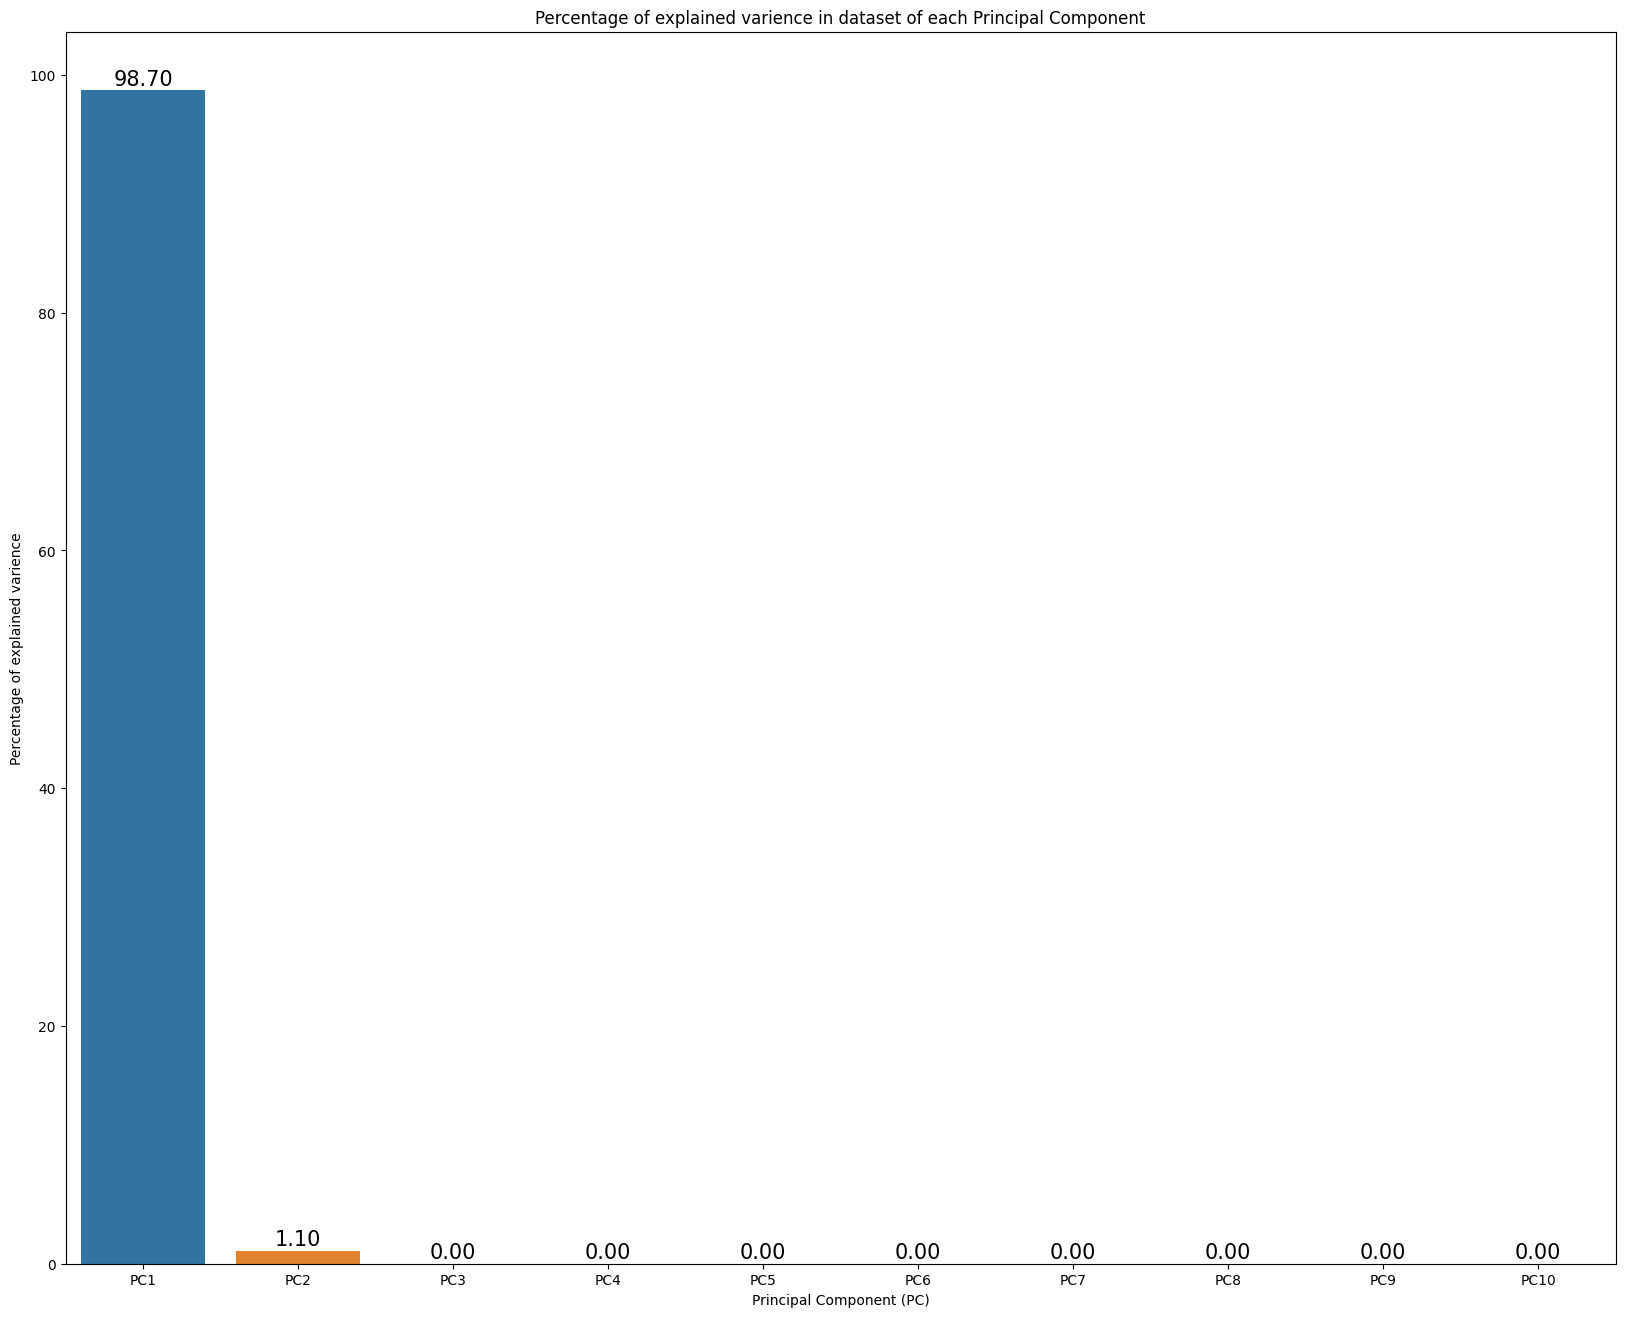

In [202]:
plt.figure(figsize=(20, 16))
plots = sns.barplot(x='Principal Component', y='Percentage of explained varience',  
                    data={'Principal Component' : labels, 
                         'Percentage of explained varience': percentage_var})
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Principal Component (PC)')
plt.ylabel('Percentage of explained varience')
plt.title('Percentage of explained varience in dataset of each Principal Component')
plt.show()

Como de pode observar, as compotentes que descrevem melhor o dataset, são essencialemente a PC1 e PC2, apesar de PC1 apresentar o melhor resulta, e representar mais de 98% do dataset.

In [186]:
np.round(100 * pca.explained_variance_ratio_, decimals=1)

array([98.7,  1.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [187]:
pca_dataframe = pd.DataFrame(pca_data, index=features_data.columns, columns=labels)

In [188]:
pca_dataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
accelerometer_x_mean,-30.623946,-0.740566,-0.707174,-0.028107,-0.008603,-0.042579,-0.041307,-0.075154,0.007539,-0.020760
accelerometer_x_median,-30.623709,-0.740365,-0.707261,-0.027720,-0.008674,-0.042672,-0.041508,-0.074844,0.006301,-0.021074
accelerometer_x_std,-31.019001,-1.443380,-0.682778,-0.027455,-0.008010,-0.042151,-0.043874,-0.076658,0.000681,-0.022098
accelerometer_x_variance,-31.026620,-1.448878,-0.688657,-0.027969,-0.008062,-0.044018,-0.042776,-0.073855,0.001732,-0.022218
accelerometer_x_rms,-30.554113,-0.890121,-0.470173,-0.100060,0.005508,-0.059191,-0.034903,-0.055360,0.010903,-0.023273
...,...,...,...,...,...,...,...,...,...,...
avh,-27.038669,1.200524,2.682761,-0.472069,-0.045938,0.171439,-0.258514,-0.746791,-0.352652,-0.048943
avg,30.907577,105.999045,-3.697992,0.223038,0.047719,0.048098,0.006325,0.016395,-0.005691,0.008023
aratg,-31.014210,-1.437506,-0.677091,-0.037792,-0.014816,-0.044363,-0.045929,-0.081365,0.006147,-0.024165
aae,287.980814,-1.934838,-0.041337,-0.003027,0.000031,0.000154,-0.005382,-0.004507,-0.007931,-0.001944


In [216]:
pca.components_.shape

(10, 8590)

In [214]:
sklearn.__version__

'1.1.2'

In [212]:
import sklearn

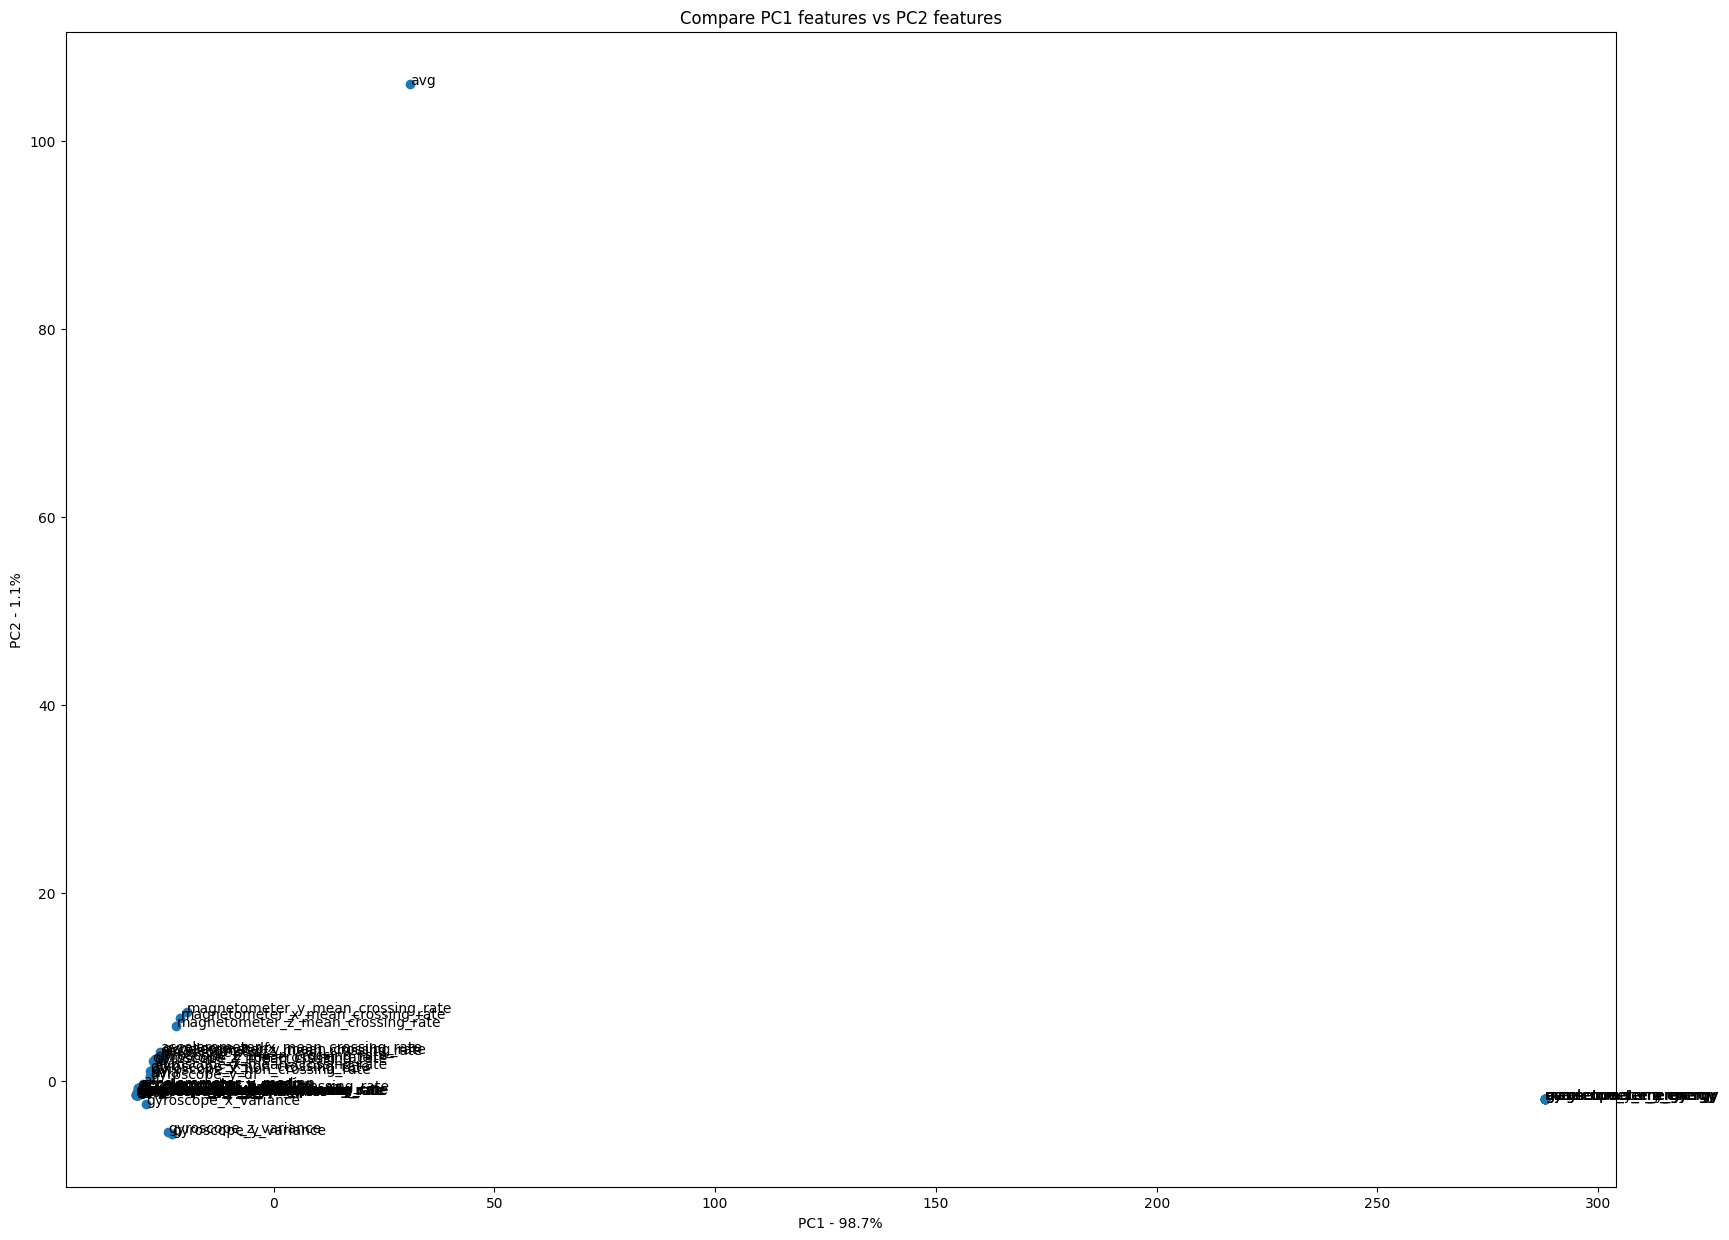

In [181]:
plt.figure(figsize=(20, 15))
plt.scatter(pca_dataframe.PC1, pca_dataframe.PC2)
plt.title('Compare PC1 features vs PC2 features')
plt.xlabel('PC1 - {0}%'.format(percentage_var[0]))
plt.ylabel('PC2 - {0}%'.format(percentage_var[1]))
for sample in pca_dataframe.index:
    plt.annotate(sample, (pca_dataframe.PC1.loc[sample], pca_dataframe.PC2.loc[sample]))
plt.show()